Método de la función inversa para la distribución de Fisher-Tippett

De dato tengo la distribución de probabilida integrada F(x) => la invierto analíticamente y tengo x(y) y eso es todo lo que necesito para luego definir la función llamada RNG_FisherT que me devuelve números aleatorios siguiente la función de Fisher-Tippett

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
plt.style.use('dark_background')

In [3]:
# Defico la función y su función de probabilidad acumulada:
def FisherT(X, alpha, beta):
    """ Función distribución Fisher-Tippett
    
    Parameters
    ----------
    X : list
        Lista de valores para el eje X
    alpha : .float
        
    beta : .float
 
    Returns
    -------
    Y : list
        Lista con los valores de Y(x) para la distribución Fisher-Tippett
        
    """
    import numpy as np
    Y = []
    ij = 0
    while ij<len(X):
        Aux = (alpha-X[ij])/beta
        Y.append( (1/beta) * (np.exp(Aux - np.exp(Aux))) )
        ij = ij + 1
    return Y

def AC_FisherT(X, alpha, beta):
    """ Función de probabilidad ACUMULADA de la distribución Fisher-Tippett
    
    Parameters
    ----------
    X : list
        Lista de valores para el eje X
    alpha : .float
        
    beta : .float
 
    Returns
    -------
    Y : list
        Lista con los valores de Y(x) para la distribución de probabilidad Fisher-
        
    """
    import numpy as np
    ij = 0
    Y = []
    while ij<len(X):
        Aux = (alpha-X[ij])/beta
        Y.append( np.exp(-np.exp(Aux)) )
        ij = ij + 1
    return Y

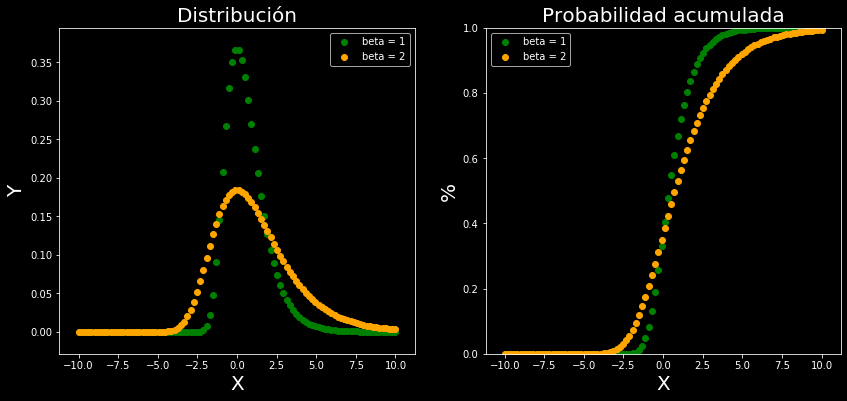

In [4]:
# Testo para ver la función y su distribución de prob. acumulada
al = 0
be1 = 1 # Graficaré dos betas
be2 = 2
X = np.linspace(-10,10,100)

Y1 = FisherT(X, al, be1)
Y2 = FisherT(X, al, be2)
AC1 = AC_FisherT(X, al, be1)
AC2 = AC_FisherT(X, al, be2)
# Grafico
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].scatter(X, Y1, color='green', label='beta = 1')
ax[0].scatter(X, Y2, color='orange', label='beta = 2')
ax[1].scatter(X, AC1, color='green', label='beta = 1')
ax[1].scatter(X, AC2, color='orange', label='beta = 2')

ax[0].set_title('Distribución', fontsize=20)
ax[0].set_xlabel('X', fontsize=20)
ax[0].set_ylabel('Y', fontsize=20);
ax[0].legend()
ax[1].set_title('Probabilidad acumulada', fontsize=20)
ax[1].set_xlabel('X', fontsize=20)
ax[1].set_ylabel('%', fontsize=20)
ax[1].set_ylim(0,1)
ax[1].legend();

In [5]:
# Defino la función inversa de la función de probabilidad acumulada
def RNG_FisherT(Y, alpha, beta):
    """ Función de probabilidad ACUMULADA INVERSA de la distribución Fisher-Tippett
    
    Parameters
    ----------
    Y : list
        Lista de valores para el eje Y, en en intervalo [0,1]
    alpha : .float
        
    beta : .float
 
    Returns
    -------
    X : list
        Lista con los valores de X(Y) para la distribución de probabilidad FisherP
        
    """
    import numpy as np
    ij = 0
    X = []
    while ij<len(Y):
        X.append( alpha - beta*( np.log(-np.log(Y[ij])) ) )
        ij = ij + 1
    return X

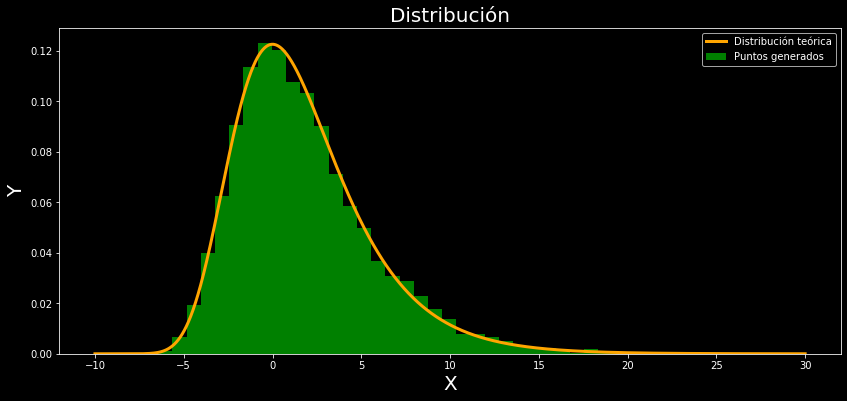

In [6]:
# Creo unos valores random para Y en [0,1] y la comparo con la distribución teórica
N = 10000
al = 0
be = 3
# Genero con mi función:
Ys = np.random.random(N)
Xs = RNG_FisherT(Ys, al, be)
# Distribución teórica
Xteo = np.linspace(-10,30, N)
Yteo = FisherT(Xteo, al, be)

# Grafico
fig, ax = plt.subplots(1, 1, figsize = (14,6))

ax.hist(Xs, bins=40, color='green', label='Puntos generados', density=True)
ax.plot(Xteo, Yteo, color='orange', label='Distribución teórica', lw=3, zorder=2)

ax.set_title('Distribución', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.legend();